In [1]:
import pandas as pd
import numpy as np 

In [2]:
train_data = pd.read_csv("Titanictrain.csv")
test_data = pd.read_csv("Titanictest.csv")
y = train_data['Survived']
combine = [train_data, test_data]

Get Column Names

In [3]:
print(train_data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Which features are categorical? Categorical : Survived, Sex, Embarked. Ordinal : Pclass

Which features are numerical? Age, Fare. Discrete : SibSp, Parch

Which features are mixed data types? Numeric and Alphanumeric : Ticket. Alphanumeric : Cabin

Which features may contain errors or typos? Maybe Name Feature

In [5]:
train_data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Which features contain blank, null or empty values? Age : 177, Cabin : 687, Embarked : 2
What are the data types for various features? 

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [10]:
def SurvivedRatioData(data : str): 
    return pd.DataFrame(train_data[[data, 'Survived']].groupby(data, as_index = False).mean().sort_values(by = 'Survived', ascending = False))
SurvivedRatioData('Pclass')

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
SurvivedRatioData('Sex')

,Sex,Survived
0,female,0.742038
1,male,0.188908


Almost 75 percent of womans survived. 

In [12]:
SurvivedRatioData('SibSp')

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
SurvivedRatioData('Parch')

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


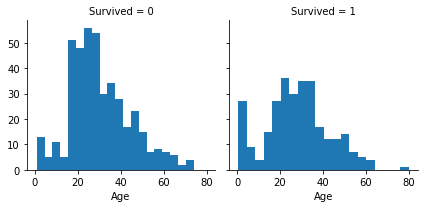

In [14]:
import seaborn as sns 
import matplotlib.pyplot as plt
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Observations.
    Infants (Age <=4) had high survival rate.
    Oldest passengers (Age = 80) survived.
    Large number of 15-25 year olds did not survive.
    Most passengers are in 15-35 age range.
Decisions.
    We should consider Age (our assumption classifying #2) in our model training.
    Complete the Age feature for null values (completing #1).
    We should band age groups (creating #3).

In [15]:
train_data = train_data.drop(['Ticket', 'Cabin'], axis = 1)
test_data = test_data.drop(['Ticket', 'Cabin'], axis = 1)
combine = [train_data, test_data]

In [16]:
for dataset in combine: 
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.' , expand = False)
    
pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [17]:
for dataset in combine: 
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col','Don','Dr','Major', 'Rev', 'Sir', 'Jonkheer','Dona'],'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [18]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [19]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [20]:
train_data.drop(['Name', 'PassengerId'], inplace = True, axis = 1)

In [21]:
test_data.drop(['Name'],axis = 1, inplace = True)
combine = [train_data,test_data]
train_data.shape, test_data.shape

((891, 9), (418, 9))

In [22]:
for dataset in combine: 
    dataset['Sex'] = dataset['Sex'].map({'female' : 0, 'male' : 1}).astype(int)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,1
1,1,1,0,38.0,1,0,71.2833,C,3
2,1,3,0,26.0,0,0,7.9250,S,2
3,1,1,0,35.0,1,0,53.1000,S,3
4,0,3,1,35.0,0,0,8.0500,S,1


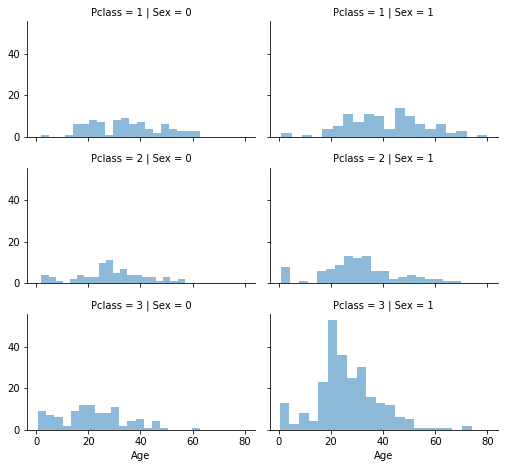

In [23]:
grid = sns.FacetGrid(train_data, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [24]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [25]:
#  Buraya geri dönülecek. 
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22,1,0,7.2500,S,1
1,1,1,0,38,1,0,71.2833,C,3
2,1,3,0,26,0,0,7.9250,S,2
3,1,1,0,35,1,0,53.1000,S,3
4,0,3,1,35,0,0,8.0500,S,1


In [26]:
train_data['AgeBand'] = pd.cut(train_data['Age'], 5)
train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index = False).mean().sort_values(by = 'AgeBand', ascending = True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [27]:
for dataset in combine: 
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <=32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <=48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <=64), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 64), 'Age'] = 4
    
train_data.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,1,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,0,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,0,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,0,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,1,2,0,0,8.0500,S,1,"(32.0, 48.0]"
5,0,3,1,1,0,0,8.4583,Q,1,"(16.0, 32.0]"
6,0,1,1,3,0,0,51.8625,S,1,"(48.0, 64.0]"
7,0,3,1,0,3,1,21.0750,S,4,"(-0.08, 16.0]"
8,1,3,0,1,0,2,11.1333,S,3,"(16.0, 32.0]"
9,1,2,0,0,1,0,30.0708,C,3,"(-0.08, 16.0]"


In [28]:
train_data.drop(['AgeBand'], axis = 1, inplace = True)
combine = [train_data,test_data]
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,1,1,0,7.2500,S,1
1,1,1,0,2,1,0,71.2833,C,3
2,1,3,0,1,0,0,7.9250,S,2
3,1,1,0,2,1,0,53.1000,S,3
4,0,3,1,2,0,0,8.0500,S,1


In [29]:
for dataset in combine: 
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [30]:
for dataset in combine: 
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index = False).mean()


,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [31]:
train_data.drop(['Parch', 'SibSp', 'FamilySize'],inplace = True, axis = 1)
test_data.drop(['Parch', 'SibSp', 'FamilySize'],inplace = True, axis = 1)
combine = [train_data,test_data]
train_data.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,1,1,7.2500,S,1,0
1,1,1,0,2,71.2833,C,3,0
2,1,3,0,1,7.9250,S,2,1
3,1,1,0,2,53.1000,S,3,0
4,0,3,1,2,8.0500,S,1,1


In [32]:
for dataset in combine: 
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
    
train_data.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [33]:
freq_port = train_data.Embarked.dropna().mode()[0]
freq_port

'S'

In [34]:
for dataset in combine: 
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [35]:
for dataset in combine: 
    dataset['Embarked'] = dataset['Embarked'].map({'S' : 0,'C' : 1, 'Q' : 2 }).astype(int)
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,1,1,7.2500,0,1,0,3
1,1,1,0,2,71.2833,1,3,0,2
2,1,3,0,1,7.9250,0,2,1,3
3,1,1,0,2,53.1000,0,3,0,2
4,0,3,1,2,8.0500,0,1,1,6


In [36]:
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace = True)
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,1,2,7.8292,2,1,1,6
1,893,3,0,2,7.0000,0,3,0,6
2,894,2,1,3,9.6875,2,1,1,6
3,895,3,1,1,8.6625,0,1,1,3
4,896,3,0,1,12.2875,0,3,0,3


In [37]:
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4)
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [38]:
for dataset in combine: 
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 31.0), 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class,FareBand
0,0,3,1,1,0,0,1,0,3,"(-0.001, 7.91]"
1,1,1,0,2,3,1,3,0,2,"(31.0, 512.329]"
2,1,3,0,1,1,0,2,1,3,"(7.91, 14.454]"
3,1,1,0,2,3,0,3,0,2,"(31.0, 512.329]"
4,0,3,1,2,1,0,1,1,6,"(7.91, 14.454]"


In [39]:
train_data.drop( ['FareBand'],inplace = True, axis = 1)
combine = [train_data, test_data]
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,1,1,0,0,1,0,3
1,1,1,0,2,3,1,3,0,2
2,1,3,0,1,1,0,2,1,3
3,1,1,0,2,3,0,3,0,2
4,0,3,1,2,1,0,1,1,6


In [40]:
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,1,2,0,2,1,1,6
1,893,3,0,2,0,0,3,0,6
2,894,2,1,3,1,2,1,1,6
3,895,3,1,1,1,0,1,1,3
4,896,3,0,1,1,0,3,0,3


In [41]:
from sklearn.ensemble import RandomForestClassifier
X_train = train_data.drop('Survived', axis = 1)
Y_train = train_data['Survived']
X_test = test_data.drop('PassengerId', axis = 1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [42]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.64

In [43]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rfc = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [44]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'n_estimators': 200}

In [45]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')
rfc1.fit(X_train, Y_train)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)

In [47]:
y_pred1 = rfc1.predict(X_test)

In [48]:
submission = pd.DataFrame({'PassengerId' : test_data['PassengerId'],'Survived' : y_pred1})
submission.to_csv("submission.csv", index =False)